In [1]:
import pandas as pd
import seaborn as sns
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# read original fema data
fema = pd.read_csv('data/RegistrationIntakeIndividualsHouseholdPrograms.csv', low_memory=False)
fema.head()

,disasterNumber,state,county,city,zipCode,totalValidRegistrations,validCallCenterRegistrations,validWebRegistrations,validMobileRegistrations,ihpReferrals,ihpEligible,ihpAmount,haReferrals,haEligible,haAmount,onaReferrals,onaEligible,onaAmount,id
0,1439,TX,Aransas (County),ROCKPORT,77823,1,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,60f2948f5d037ccb7dce6bb4
1,1439,TX,Brazoria (County),LAKE JACKSON,77566,11,0,0,0,9,6,20074.75,8,3,14346.84,8,5,5727.91,60f2948f5d037ccb7dce6bc1
2,1439,TX,Aransas (County),BAYSIDE,78340,2,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,60f2948f5d037ccb7dce6bb0
3,1439,TX,Brazoria (County),SWEENY,77480,4,0,0,0,4,3,10137.50,3,2,9587.50,1,1,550.00,60f2948f5d037ccb7dce6bc7
4,1439,TX,Brazoria (County),WEST COLUMBIA,77486,5,0,0,0,5,3,6830.30,4,3,6830.30,2,0,0.00,60f2948f5d037ccb7dce6bc8


In [3]:
# check if there are duplicate rows
print(len(fema))
fema = fema.drop_duplicates()
print(len(fema))

157516
157516


In [4]:
# read disaster type, this allows to explore variations by disaster type
disaster_type = pd.read_csv('data/DisasterDeclarationsSummaries.csv', low_memory=False)
disaster_type.head()
print(len(disaster_type))
disaster_type = disaster_type.drop_duplicates()
print(len(disaster_type))

61953
61953


In [5]:
# merge both datasets together, this will produce a lot of repeated observations which we will filter later
fema_complete = fema.merge(disaster_type[['disasterNumber','incidentType',
                                 'declarationTitle']], how = 'left', left_on='disasterNumber', 
                  right_on='disasterNumber', validate = 'm:m')
fema_complete.head()

,disasterNumber,state,county,city,zipCode,totalValidRegistrations,validCallCenterRegistrations,validWebRegistrations,validMobileRegistrations,ihpReferrals,ihpEligible,ihpAmount,haReferrals,haEligible,haAmount,onaReferrals,onaEligible,onaAmount,id,incidentType,declarationTitle
0,1439,TX,Aransas (County),ROCKPORT,77823,1,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,60f2948f5d037ccb7dce6bb4,Severe Storm(s),"SEVERE STORMS, TORNADOES AND FLOODING"
1,1439,TX,Aransas (County),ROCKPORT,77823,1,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,60f2948f5d037ccb7dce6bb4,Severe Storm(s),"SEVERE STORMS, TORNADOES AND FLOODING"
2,1439,TX,Aransas (County),ROCKPORT,77823,1,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,60f2948f5d037ccb7dce6bb4,Severe Storm(s),"SEVERE STORMS, TORNADOES AND FLOODING"
3,1439,TX,Aransas (County),ROCKPORT,77823,1,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,60f2948f5d037ccb7dce6bb4,Severe Storm(s),"SEVERE STORMS, TORNADOES AND FLOODING"
4,1439,TX,Aransas (County),ROCKPORT,77823,1,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,60f2948f5d037ccb7dce6bb4,Severe Storm(s),"SEVERE STORMS, TORNADOES AND FLOODING"


In [6]:
# the reduced dataset has the same number of observations than the original data
print(len(fema_complete))
fema_complete = fema_complete.drop_duplicates()
print(len(fema_complete))

9048198
157516


In [7]:
# check total number of registrations
fema_complete.groupby('incidentType')['totalValidRegistrations'].sum()

incidentType
Biological            240588
Dam/Levee Break         5235
Earthquake             85560
Fire                  183761
Flood                 760114
Hurricane           12790521
Mud/Landslide           1022
Other                    958
Severe Ice Storm      448805
Severe Storm(s)      2120824
Tornado               118845
Typhoon                65160
Volcano                 2881
Name: totalValidRegistrations, dtype: int64

In [8]:
# check unique type of disaster
fema_complete.groupby(['incidentType'])['disasterNumber'].nunique()

incidentType
Biological           56
Dam/Levee Break       1
Earthquake            9
Fire                 17
Flood                45
Hurricane            77
Mud/Landslide         1
Other                 2
Severe Ice Storm      4
Severe Storm(s)     239
Tornado              14
Typhoon               9
Volcano               1
Name: disasterNumber, dtype: int64

In [9]:
# approval rate by disaster type for 
fema_complete['succes_ihp'] = fema_complete['ihpEligible']/fema_complete['totalValidRegistrations']
fema_complete['succes_ha'] = fema_complete['haEligible']/fema_complete['totalValidRegistrations']
fema_complete['succes_ona'] = fema_complete['onaEligible']/fema_complete['totalValidRegistrations']
fema_complete.head()

,disasterNumber,state,county,city,zipCode,totalValidRegistrations,validCallCenterRegistrations,validWebRegistrations,validMobileRegistrations,ihpReferrals,ihpEligible,ihpAmount,haReferrals,haEligible,haAmount,onaReferrals,onaEligible,onaAmount,id,incidentType,declarationTitle,succes_ihp,succes_ha,succes_ona
0,1439,TX,Aransas (County),ROCKPORT,77823,1,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,60f2948f5d037ccb7dce6bb4,Severe Storm(s),"SEVERE STORMS, TORNADOES AND FLOODING",0.000000,0.000000,0.000000
18,1439,TX,Brazoria (County),LAKE JACKSON,77566,11,0,0,0,9,6,20074.75,8,3,14346.84,8,5,5727.91,60f2948f5d037ccb7dce6bc1,Severe Storm(s),"SEVERE STORMS, TORNADOES AND FLOODING",0.545455,0.272727,0.454545
36,1439,TX,Aransas (County),BAYSIDE,78340,2,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,60f2948f5d037ccb7dce6bb0,Severe Storm(s),"SEVERE STORMS, TORNADOES AND FLOODING",0.000000,0.000000,0.000000
54,1439,TX,Brazoria (County),SWEENY,77480,4,0,0,0,4,3,10137.50,3,2,9587.50,1,1,550.00,60f2948f5d037ccb7dce6bc7,Severe Storm(s),"SEVERE STORMS, TORNADOES AND FLOODING",0.750000,0.500000,0.250000
72,1439,TX,Brazoria (County),WEST COLUMBIA,77486,5,0,0,0,5,3,6830.30,4,3,6830.30,2,0,0.00,60f2948f5d037ccb7dce6bc8,Severe Storm(s),"SEVERE STORMS, TORNADOES AND FLOODING",0.600000,0.600000,0.000000


In [10]:
# generate data for barchart
fema_ihp_barchart = fema_complete.groupby('incidentType')['succes_ihp'].mean().reset_index()
fema_ha_barchart = fema_complete.groupby('incidentType')['succes_ha'].mean().reset_index()
fema_ona_barchart = fema_complete.groupby('incidentType')['succes_ona'].mean().reset_index()

In [11]:
# explore the data
fema_ihp_barchart

,incidentType,succes_ihp
0,Biological,0.407319
1,Dam/Levee Break,0.130052
2,Earthquake,0.474692
3,Fire,0.097374
4,Flood,0.391498
5,Hurricane,0.351433
6,Mud/Landslide,0.378418
7,Other,0.202562
8,Severe Ice Storm,0.149331
9,Severe Storm(s),0.474927


In [12]:
# inspect ha data 
fema_ha_barchart

,incidentType,succes_ha
0,Biological,0.000000
1,Dam/Levee Break,0.122289
2,Earthquake,0.412772
3,Fire,0.057319
4,Flood,0.346806
5,Hurricane,0.242601
6,Mud/Landslide,0.002740
7,Other,0.046910
8,Severe Ice Storm,0.131783
9,Severe Storm(s),0.424059


In [13]:
# repeat for ONA
fema_ona_barchart

,incidentType,succes_ona
0,Biological,0.407319
1,Dam/Levee Break,0.027322
2,Earthquake,0.140444
3,Fire,0.068697
4,Flood,0.126810
5,Hurricane,0.193966
6,Mud/Landslide,0.376461
7,Other,0.190141
8,Severe Ice Storm,0.048732
9,Severe Storm(s),0.153890


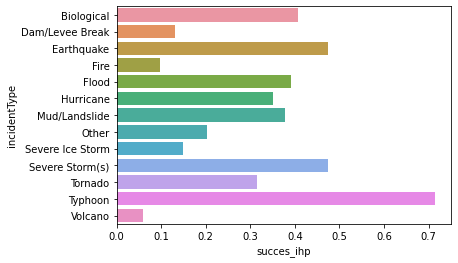

In [14]:
# suuccess of ihp
ihp_success = sns.barplot(y="incidentType", x="succes_ihp", data=fema_ihp_barchart)

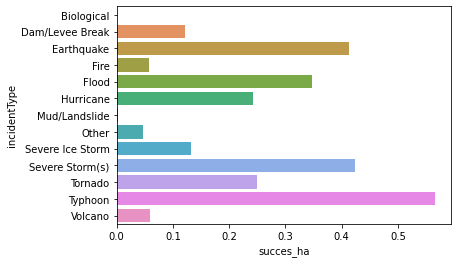

In [15]:
# do ha barchart
ha_success = sns.barplot(y="incidentType", x="succes_ha", data=fema_ha_barchart)

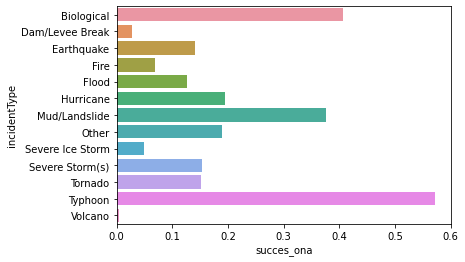

In [16]:
# ona
ona_success = sns.barplot(y="incidentType", x="succes_ona", data=fema_ona_barchart)

In [17]:
# fema fire by state
state = fema_complete[fema_complete['incidentType']=='Fire']
state.groupby(['state'])['succes_ihp'].mean().reset_index()

,state,succes_ihp
0,CA,0.083733
1,LA,0.000000
2,OK,0.215814
3,OR,0.073628
4,TN,0.191721
5,TX,0.262173


In [18]:
# ha
state.groupby(['state'])['succes_ha'].mean().reset_index()

,state,succes_ha
0,CA,0.041139
1,LA,0.000000
2,OK,0.210122
3,OR,0.035750
4,TN,0.187721
5,TX,0.226190


In [19]:
# ona
state.groupby(['state'])['succes_ona'].mean().reset_index()

,state,succes_ona
0,CA,0.061905
1,LA,0.000000
2,OK,0.111029
3,OR,0.064076
4,TN,0.080996
5,TX,0.157787
